Load in the tokenized sentences

In [2]:
import pandas as pd
from tqdm import tqdm

# Load the original CSV file
df = pd.read_csv('../sent.csv')

Concatenate them based on the paper_id so that each entry represents a single document.

In [17]:
# Concatenate sentences based on 'paper_id'
concatenated_df = df.groupby('paper_id')['text'].apply(lambda x: ' '.join(x)).reset_index()

In [4]:
concatenated_df.to_csv('../concatenated.csv', index=False)

In [5]:
concatenated_df = pd.read_csv('../concatenated.csv')

Load BERTopic model for topic extraction

In [4]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

In [6]:
# Each entry in the concatenated df is a paper
documents = concatenated_df['text'].tolist()

In [9]:
# Initialize BERTopic with KeyBERTInspired representation model
model = BERTopic(representation_model=KeyBERTInspired())

Extract the topics from the documents (this takes about 10 min)

In [34]:
# Fit the model and transform data into topics
topics, _ = model.fit_transform(documents)

In [23]:
# Get the most frequent topics
most_frequent_topics = model.get_topic_freq()
print(most_frequent_topics)

     Topic  Count
6       -1   3583
11       0    353
18       1    294
30       2    247
29       3    177
..     ...    ...
37     151     11
92     152     11
156    153     11
66     154     10
145    155     10

[157 rows x 2 columns]


In [30]:
# Visualize the topics
model.visualize_topics()

In [15]:
model.visualize_term_rank()

In [24]:
model.visualize_barchart()

In [27]:
model.visualize_heatmap()

In [33]:
model.visualize_hierarchy()

In [38]:
# Save the model
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
model.save("../BERTopic_model", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

In [7]:
model = BERTopic.load("../BERTopic_model")

Topic labels

In [9]:
# Create a list of labels for each topic
labels = model.generate_topic_labels(topic_prefix=False)

In [32]:
for label in labels:
    print(label)

pandemic_covid19_infection
pandemic_coronavirus_covid19
coronavirus_coronaviruses_covid19
classroom_students_educational
aerosol_aerosols_respiratory
publication_disclosure_disclose
diagnostic_assays_pcr
influenza_flu_pandemic
oncology_cancer_covid19
pandemic_covid19_anxiety
antiviral_covid19_hiv
respiratory_ventilatory_ventilator
oder_welche_eines
vaccine_vaccination_vaccines
telemedicine_telehealth_teledermatology
ai_classification_recognition
cytokines_inflammation_cytokine
pneumonia_lung_pulmonary
encephalitis_encephalopathy_neurological
pandemic_markets_economic
thromboprophylaxis_covid19_anticoagulation
antimicrobial_antibiotics_pathogens
metabolites_medicinal_extracts
proteins_protein_enzymes
myocarditis_myocardial_cardiac
rhinovirus_influenza_asthma
epidemic_outbreak_infectious
tweets_twitter_disinformation
dental_dentistry_dentist
pandemic_hospital_hospitals
loneliness_aging_depression
sustainability_sustainable_emissions
biosensors_biosensor_nanoparticles
pregnancy_pregnant_i

Topics Exploration

In [37]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3583,-1_pandemic_covid19_infection_disease,"[pandemic, covid19, infection, disease, virus,...",NaN
1,0,353,0_pandemic_coronavirus_covid19_epidemic,"[pandemic, coronavirus, covid19, epidemic, out...",NaN
2,1,294,1_coronavirus_coronaviruses_covid19_sarscov2,"[coronavirus, coronaviruses, covid19, sarscov2...",NaN
3,2,247,2_classroom_students_educational_teaching,"[classroom, students, educational, teaching, e...",NaN
4,3,177,3_aerosol_aerosols_respiratory_ventilation,"[aerosol, aerosols, respiratory, ventilation, ...",NaN
...,...,...,...,...,...
152,151,11,151_coronavirus_covid19_pneumonia_infection,"[coronavirus, covid19, pneumonia, infection, c...",NaN
153,152,11,152_pneumonia_infections_pathogens_infection,"[pneumonia, infections, pathogens, infection, ...",NaN
154,153,11,153_vaccines_vaccine_vaccination_vaccinated,"[vaccines, vaccine, vaccination, vaccinated, i...",NaN
155,154,10,154_flaviviruses_flavivirus_zika_dengue,"[flaviviruses, flavivirus, zika, dengue, viral...",NaN


In [54]:
type(model.get_topic_info())

pandas.core.frame.DataFrame

In [39]:
model.get_document_info(documents).sort_values(by='Topic')

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
3484,severe acute respiratory syndrome SARS is an a...,-1,-1_pandemic_covid19_infection_disease,"[pandemic, covid19, infection, disease, virus,...",NaN,pandemic - covid19 - infection - disease - vir...,False
2460,the COVID-19 pandemic has dramatically changed...,-1,-1_pandemic_covid19_infection_disease,"[pandemic, covid19, infection, disease, virus,...",NaN,pandemic - covid19 - infection - disease - vir...,False
7952,what do you do when your friends are starving ...,-1,-1_pandemic_covid19_infection_disease,"[pandemic, covid19, infection, disease, virus,...",NaN,pandemic - covid19 - infection - disease - vir...,False
8918,n urse leaders NLs play a pivotal role in shap...,-1,-1_pandemic_covid19_infection_disease,"[pandemic, covid19, infection, disease, virus,...",NaN,pandemic - covid19 - infection - disease - vir...,False
4847,there are some theories such as the Health Bel...,-1,-1_pandemic_covid19_infection_disease,"[pandemic, covid19, infection, disease, virus,...",NaN,pandemic - covid19 - infection - disease - vir...,False
...,...,...,...,...,...,...,...
7541,to the Editor: The clinical impact of COVID-19...,155,155_covid19_fever_pneumonia_infection,"[covid19, fever, pneumonia, infection, comorbi...",NaN,covid19 - fever - pneumonia - infection - como...,False
3028,coronavirus disease 2019 COVID- 19 has had a c...,155,155_covid19_fever_pneumonia_infection,"[covid19, fever, pneumonia, infection, comorbi...",NaN,covid19 - fever - pneumonia - infection - como...,False
7647,the novel coronavirus disease 2019 COVID-19 ca...,155,155_covid19_fever_pneumonia_infection,"[covid19, fever, pneumonia, infection, comorbi...",NaN,covid19 - fever - pneumonia - infection - como...,False
6337,covid-19 infection virus mainly infects elderl...,155,155_covid19_fever_pneumonia_infection,"[covid19, fever, pneumonia, infection, comorbi...",NaN,covid19 - fever - pneumonia - infection - como...,False


In [35]:
document_info = model.get_document_info(documents).sort_values(by='Topic')
document_info = document_info.reset_index()

In [36]:
print(document_info)

      index                                           Document  Topic  \
0      3484  severe acute respiratory syndrome SARS is an a...     -1   
1      2460  the COVID-19 pandemic has dramatically changed...     -1   
2      7952  what do you do when your friends are starving ...     -1   
3      8918  n urse leaders NLs play a pivotal role in shap...     -1   
4      4847  there are some theories such as the Health Bel...     -1   
...     ...                                                ...    ...   
9995   7541  to the Editor: The clinical impact of COVID-19...    155   
9996   3028  coronavirus disease 2019 COVID- 19 has had a c...    155   
9997   7647  the novel coronavirus disease 2019 COVID-19 ca...    155   
9998   6337  covid-19 infection virus mainly infects elderl...    155   
9999   5726  cOVID-19, caused by novel corona virus of seve...    155   

                                       Name  \
0     -1_pandemic_covid19_infection_disease   
1     -1_pandemic_covid19_inf

In [11]:
most_frequent_topics = model.get_topic_freq()
most_frequent_topics['Label'] = most_frequent_topics['Topic'].apply(lambda x: labels[x] if x < len(labels) else 'N/A')
print(most_frequent_topics)

     Topic  Count                              Label
6       -1   3583            covid19_fever_pneumonia
11       0    353         pandemic_covid19_infection
18       1    294       pandemic_coronavirus_covid19
30       2    247  coronavirus_coronaviruses_covid19
29       3    177     classroom_students_educational
..     ...    ...                                ...
37     151     11         hardware_computing_systems
92     152     11      coronavirus_covid19_pneumonia
156    153     11     pneumonia_infections_pathogens
66     154     10       vaccines_vaccine_vaccination
145    155     10       flaviviruses_flavivirus_zika

[157 rows x 3 columns]


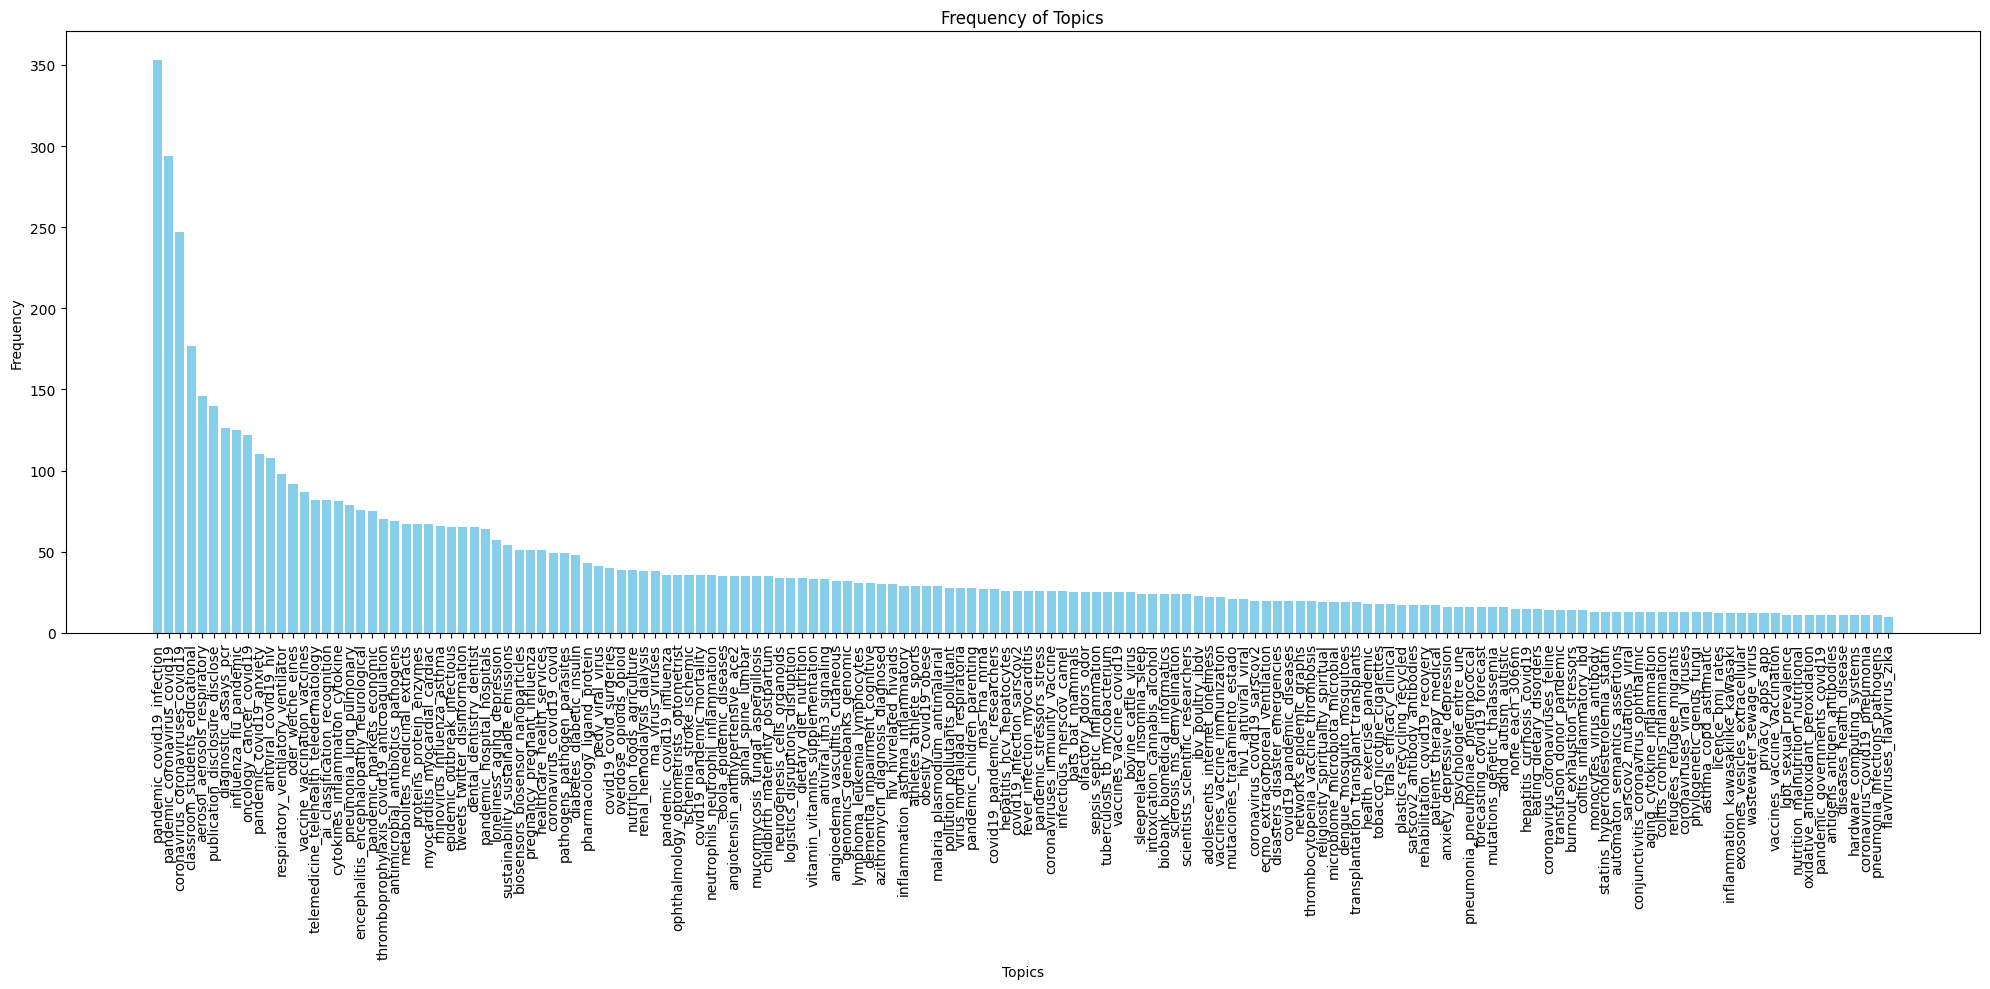

In [19]:
import matplotlib.pyplot as plt

# Filter out topic -1
filtered_topics = most_frequent_topics[most_frequent_topics['Topic'] != -1]

# Sort topics by frequency
sorted_topics = filtered_topics.sort_values(by='Count', ascending=True)

# Adjusting figure size for a vertical layout
plt.figure(figsize=(20, 10))  # Wider figure to accommodate all topics

# Creating a vertical bar chart
plt.bar(filtered_topics['Label'], filtered_topics['Count'], color='skyblue')

# Adding labels and title
plt.ylabel('Frequency')
plt.xlabel('Topics')
plt.title('Frequency of Topics')

# Rotating x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Adjust layout for better fit and readability
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
most_frequent_topics.to_csv('../most_frequent_topics.csv', index=False)

Summarization Code:
1. Find the documents which pertain to each topic
2. Find the sentences which contain the topic keywords in each relevant document.
3. Concatenate them
4. Use sumy's LexRank to generate extractive summarizations of the concatenated sentences. This retrieves the most important sentences.
5. Use BART to generate abstract summaries from the extractive summaries. 

In [1]:
from transformers import pipeline
from bertopic import BERTopic
import pandas as pd
from tqdm import tqdm

In [9]:
# Load the model and load the concatenated dataframe as a list of documents
model = BERTopic.load("../BERTopic_model")
concatenated_df = pd.read_csv('../concatenated.csv')
documents = concatenated_df['text'].tolist()

In [10]:
def get_relevant_sentences(model, documents):
    """
    Retrieve the relevant sentences for each topic in the documents.

    Parameters:
    - model: The BERTopic model.
    - documents: The list of documents.

    Returns:
    - The list of relevant sentences for each topic.
    """

    # Load the document-topic distribution and topic info
    document_info = model.get_document_info(documents)
    # Get topic information, including the 'representation' column for keywords
    topic_info = model.get_topic_info()

    topic_sentences = []

    for index, topic_row in tqdm(topic_info.iterrows(), total=topic_info.shape[0]):
        topic_id = topic_row['Topic']
        
        # Relevant keywords for the topic
        keywords = topic_row['Representation']

        # Identifying documents for the topic
        relevant_docs_indices = document_info[document_info['Topic'] == topic_id]
        relevant_docs = [documents[i] for i in relevant_docs_indices.index]

        # Extract sentences containing the keywords
        relevant_sentences = []
        for doc in relevant_docs:
            for sentence in doc.split('.'):
                if any(keyword.lower() in sentence.lower() for keyword in keywords):
                    relevant_sentences.append(sentence)

        concatenated_sentences = ' '.join(relevant_sentences)
        topic_sentences.append(concatenated_sentences)

    return topic_sentences


In [11]:
topic_sentences = get_relevant_sentences(model, documents)

100%|██████████| 157/157 [00:03<00:00, 40.67it/s] 


In [2]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

def extractive_summarization(text, num_sentences=3):
    """
    Summarize text using LexRank algorithm for extractive summarization.

    Parameters:
    - text: The input text to summarize.
    - num_sentences: The number of sentences to include in the summary.

    Returns:
    - The extractive summary of the text as a string.
    """
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LexRankSummarizer()

    # Summarize the text with the specified number of sentences
    summary = summarizer(parser.document, num_sentences)

    # Convert the summary sentences back into a single string
    summary_text = " ".join([str(sentence) for sentence in summary])
    return summary_text


In [12]:
def generate_extractive_summaries(topic_sentences):
    """
    Generate extractive summaries for each topic using the extractive_summarization function.

    Parameters:
    - topic_sentences: The list of relevant sentences for each topic.
    Returns:
    - The list of extractive summaries for each topic.
    """
    summaries = []

    for topic_sentence in tqdm(topic_sentences, desc="Generating Summaries"):
        summary = extractive_summarization(topic_sentence)
        summaries.append(summary)


    return summaries

In [13]:
# Generate extractive summaries
extractive_summaries = generate_extractive_summaries(topic_sentences)

Generating Summaries: 100%|██████████| 157/157 [46:09<00:00, 17.64s/it]    


In [34]:
# Create a DataFrame with topic information and extractive summaries
topic_info = model.get_topic_info()
df_extractive_summaries = pd.DataFrame({'Topic': topic_info['Topic'], 'Label': labels, 'Extractive Summary': extractive_summaries})

In [35]:
print(df_extractive_summaries)

     Topic                              Label  \
0       -1         pandemic_covid19_infection   
1        0       pandemic_coronavirus_covid19   
2        1  coronavirus_coronaviruses_covid19   
3        2     classroom_students_educational   
4        3       aerosol_aerosols_respiratory   
..     ...                                ...   
152    151      coronavirus_covid19_pneumonia   
153    152     pneumonia_infections_pathogens   
154    153       vaccines_vaccine_vaccination   
155    154       flaviviruses_flavivirus_zika   
156    155            covid19_fever_pneumonia   

                                    Extractive Summary  
0    in the words of one participant from the study...  
1    since China imposed the coronavirus lockdown i...  
2    this treatment prevents the virus attaching to...  
3    adaptability is by all means the necessity ski...  
4    we conducted a rapid systematic review in line...  
..                                                 ...  
152  at the 

In [36]:
df_extractive_summaries.to_csv('../extractive_summaries.csv', index=False)

In [18]:
from transformers import pipeline
from tqdm import tqdm

def generate_abstractive_summaries(extractive_summaries):
    """
    Applies abstractive summarization on the provided extractive summaries.

    Parameters:
    - extractive_summaries: The list of extractive summaries.
    Returns:
    - The list of abstractive summaries.
    """
    summarizer = pipeline('summarization', model='facebook/bart-large-cnn')
    
    summaries = []

    # Wrap the loop with tqdm for progress tracking
    for summary in tqdm(extractive_summaries, desc="Generating Abstractive Summaries"):
        abstractive_summary = summarizer(summary, min_length=5, max_length=500, truncation=True)
        # The output of summarizer is a list of summaries; extract the summary text.
        summary_text = abstractive_summary[0]['summary_text']
        summaries.append(summary_text)

    return summaries


In [19]:
# Generate abstractive summaries
abstractive_summaries = generate_abstractive_summaries(topic_sentences)

Generating Abstractive Summaries: 100%|██████████| 157/157 [23:40<00:00,  9.05s/it]


In [37]:
df_abstractive_summaries = pd.DataFrame({'Topic': topic_info['Topic'], 'Label': labels, 'Abstractive Summary': abstractive_summaries})
print(df_abstractive_summaries)

     Topic                              Label  \
0       -1         pandemic_covid19_infection   
1        0       pandemic_coronavirus_covid19   
2        1  coronavirus_coronaviruses_covid19   
3        2     classroom_students_educational   
4        3       aerosol_aerosols_respiratory   
..     ...                                ...   
152    151      coronavirus_covid19_pneumonia   
153    152     pneumonia_infections_pathogens   
154    153       vaccines_vaccine_vaccination   
155    154       flaviviruses_flavivirus_zika   
156    155            covid19_fever_pneumonia   

                                   Abstractive Summary  
0    The development of highly immunogenic and safe...  
1    China imposed the coronavirus lockdown in the ...  
2    The impact of Casirivimab-Imdevimab on SARS-Co...  
3    CJSMTE's Volume 20 Issue 2, the Special Theme ...  
4    In early 2020, the emerging respiratory virus ...  
..                                                 ...  
152  At the 

In [38]:
df_abstractive_summaries.to_csv('../abstractive_summaries.csv', index=False)

In [39]:
df_abstractive_summaries = pd.read_csv('../abstractive_summaries.csv')